# Credit Card Fraud Detection: Logistic Regression

## Imports

In [50]:
%pip install numpy pandas scikit-learn matplotlib seaborn

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import log_loss




[notice] A new release of pip is available: 25.1.1 -> 25.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


## Data Initialization

In [46]:
df = pd.read_csv("card_transdata.csv")

# print(df.shape)
# print(df.head())

x = df.drop("fraud", axis=1).values   # convert to NumPy array
y = df["fraud"].values

# print("Features shape:", x.shape)
# print("Target shape:", y.shape)

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42, stratify=y
)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

print("Processed training set shape:", x_train.shape)



Processed training set shape: (800000, 7)


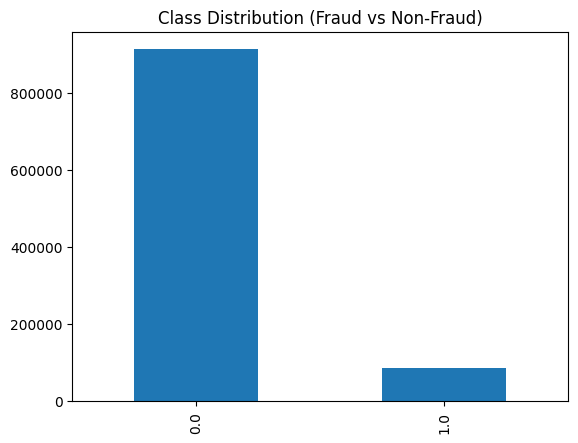

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

pd.Series(y).value_counts().plot(kind="bar")
plt.title("Class Distribution (Fraud vs Non-Fraud)")
plt.show()

## Training

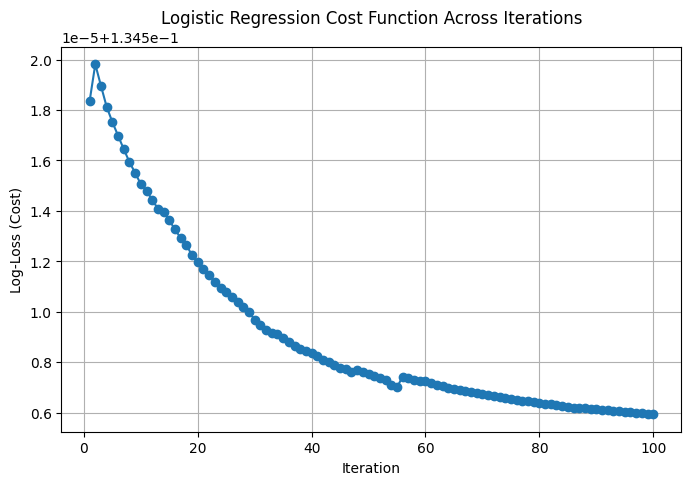

In [22]:
model = LogisticRegression(
    max_iter=10000,  
    warm_start=True,  
    solver='saga', 
    random_state=42
)

max_iterations = 100
losses = []

for i in range(max_iterations):
    model.fit(x_train, y_train)           
    y_prob = model.predict_proba(x_train) 
    loss = log_loss(y_train, y_prob)
    losses.append(loss)
    model.max_iter += 1 

plt.figure(figsize=(8,5))
plt.plot(range(1, max_iterations+1), losses, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Loss (Cost)')
plt.title('Logistic Regression Cost Function Across Iterations')
plt.grid(True)
plt.show()

## Graphs

### Feature Importance

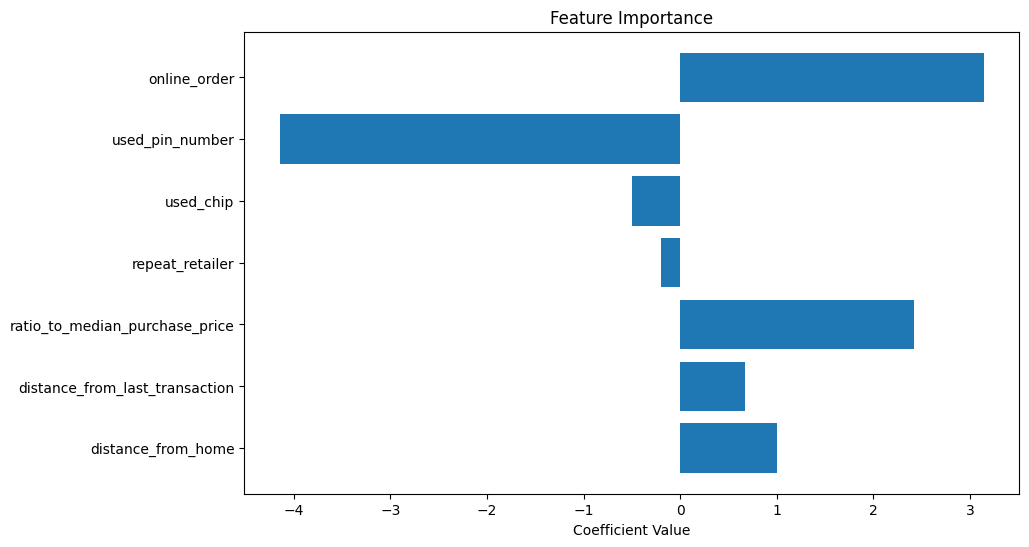

In [62]:
coefficients = model.coef_[0]
features = df.drop('fraud', axis=1).columns

# Feature Importance
plt.figure(figsize=(10,6))
plt.barh(features, coefficients)
plt.xlabel('Coefficient Value')
plt.title('Feature Importance')
plt.show()

### Probability Distribution

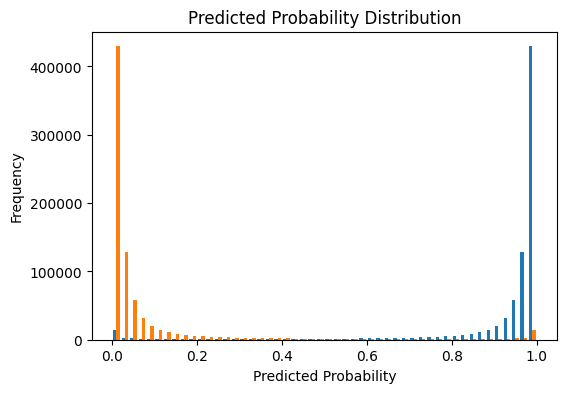

In [33]:
# Probability Distribution
plt.figure(figsize=(6,4))
plt.hist(y_prob, bins=50)
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Predicted Probability Distribution')
plt.show()

### Decision Boundary

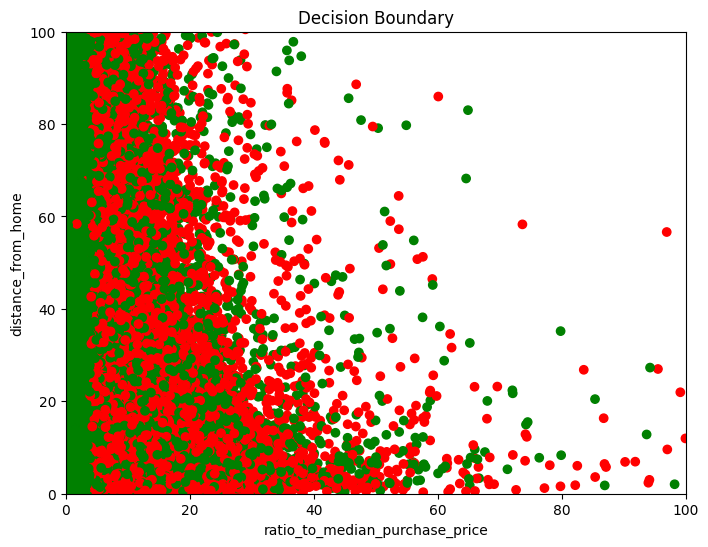

In [45]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

x1 = "ratio_to_median_purchase_price"
x2 = "distance_from_home"
y1 = "fraud"

x_data = df[[x1, x2]].values
y_data = df[y1].values


x_min, x_max = 0, 100
y_min, y_max = 0, 100
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 10),
                     np.linspace(y_min, y_max, 10))

plt.figure(figsize=(8,6))
colors = ['red' if label == 1 else 'green' for label in y_data]
plt.scatter(x_data[:,0], x_data[:,1], c=colors, marker='o')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xlabel(x1)
plt.ylabel(x2)
plt.title('Decision Boundary')
plt.show()

### True Positive vs False Positive Rates

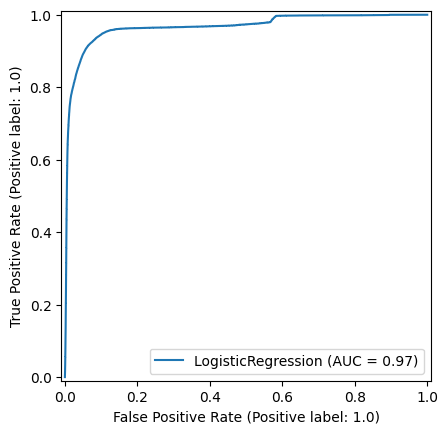

In [41]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_estimator(model, x_test, y_test)
plt.show()

### Precision vs Recall

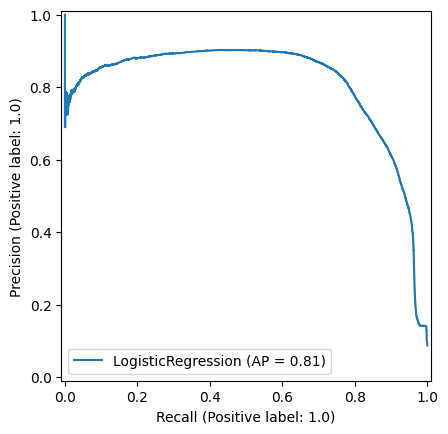

In [43]:
from sklearn.metrics import PrecisionRecallDisplay
PrecisionRecallDisplay.from_estimator(model, x_test, y_test)
plt.show()